<a href="https://colab.research.google.com/github/AnVo01/AI/blob/main/Fruits_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

train = ImageDataGenerator(rescale = 1./255)
validation = ImageDataGenerator(rescale = 1./255)

train_data = train.flow_from_directory('/content/drive/MyDrive/AI/Fruits/Train',
                                       target_size = (150,150),
                                       class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/AI/Fruits/Validate',
                                       target_size = (150,150),
                                       class_mode = 'categorical')

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=5,batch_size=128,validation_data=validation_dataset,verbose=1)

Found 4847 images belonging to 10 classes.
Found 1618 images belonging to 10 classes.
Epoch 1/5
152/152 [==============================] - 1844s 12s/step - loss: 0.9598 - accuracy: 0.8682 - val_loss: 0.0910 - val_accuracy: 0.9555
Epoch 2/5
152/152 [==============================] - 14s 93ms/step - loss: 0.1109 - accuracy: 0.9835 - val_loss: 0.0061 - val_accuracy: 0.9988
Epoch 3/5
152/152 [==============================] - 14s 91ms/step - loss: 0.0332 - accuracy: 0.9979 - val_loss: 0.0580 - val_accuracy: 0.9920
Epoch 4/5
152/152 [==============================] - 14s 91ms/step - loss: 0.0452 - accuracy: 0.9938 - val_loss: 1.6322e-05 - val_accuracy: 1.0000
Epoch 5/5
152/152 [==============================] - 14s 92ms/step - loss: 0.2010 - accuracy: 0.9891 - val_loss: 1.6179e-04 - val_accuracy: 1.0000


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [ ]:
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.00016179382510017604
độ chính xác kiểm tra là:  1.0


In [ ]:
train_data.class_indices

{'Apple Red 1': 0,
 'Avocado': 1,
 'Banana': 2,
 'Mango': 3,
 'Orange': 4,
 'Pear': 5,
 'Pineapple': 6,
 'Pitahaya Red': 7,
 'Raspberry': 8,
 'Watermelon': 9}

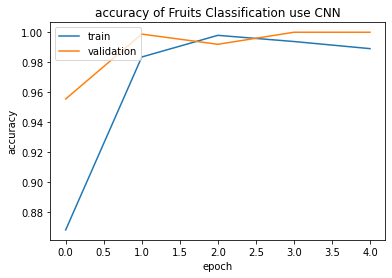

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of Fruits Classification use CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AI/Fruits_Classification_CNN.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/AI/Fruits_Classification_CNN.h5')

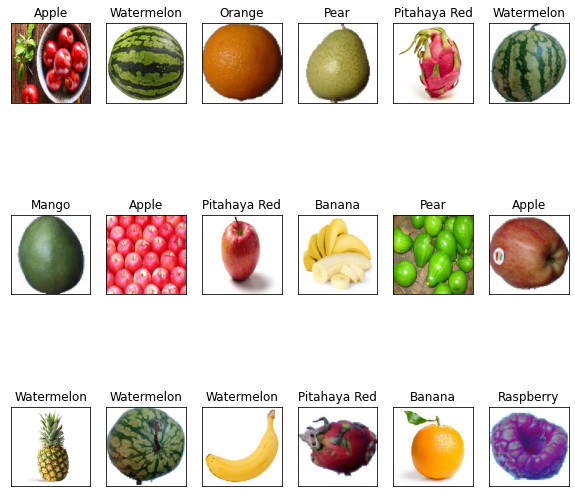

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
names = ['Apple','Avocado','Banana','Mango','Orange','Pear','Pineapple','Pitahaya Red','Raspberry','Watermelon']
dir = '/content/drive/MyDrive/AI/Fruits/Test/Testing'
plt.figure(figsize=(10,10))
for i in range(18):
  plt.subplot(3,6,i + 1)
  img = load_img(dir +'/'+ str(i)+'.jpg', target_size=(150,150))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,150,150,3)
  image = img/255.0
  plt.xticks([])
  plt.yticks([])
  plt.title(names[np.argmax(model.predict(image))])
